In [9]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.cluster import KMeans



from gensim.models import Word2Vec

In [2]:
df = pd.read_csv("df_manjiSW1.csv")

In [5]:
df2 = pd.read_csv("merged.csv")
df2.shape

(134198, 237)

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()  
        filtered_words = [word for word in words if word not in stop_words] 
        return " ".join(filtered_words) 
    return text  

df["tweet_new"] = df["tweet_new"].apply(remove_stopwords)

In [4]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)  
    return text  

df["tweet_tokens"] = df["tweet_new"].apply(tokenize_text)

df[["tweet_new", "tweet_tokens"]].head()

,tweet_new,tweet_tokens
0,biden blunders 6 month update inflation delta ...,"[biden, blunders, 6, month, update, inflation,..."
1,many people literally starving streets 19th ce...,"[many, people, literally, starving, streets, 1..."
2,supreme court siding super rich property owner...,"[supreme, court, siding, super, rich, property..."
3,biden blunders broken campaign promises inflat...,"[biden, blunders, broken, campaign, promises, ..."
4,agree confluence events right unprecedented af...,"[agree, confluence, events, right, unprecedent..."


In [6]:
kol = ['tweet','tweet_new_x','tweet_tokens','Word count','BinaryNumTarget',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Conjunctions',
 'Determiners',
 'Prepositions',
 'Digits',
 'followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']
df2 = df2[kol]

# TF IDF

In [15]:
# TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])  
y = df['BinaryNumTarget'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),  
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9813, Precision=0.9841, Recall=0.9794, F1=0.9817
Decision Tree: Accuracy=0.9693, Precision=0.9697, Recall=0.9705, F1=0.9701
Naive Bayes: Accuracy=0.9458, Precision=0.9373, Recall=0.9583, F1=0.9477
KNN: Accuracy=0.7373, Precision=0.6614, Recall=0.9993, F1=0.7959
SVM: Accuracy=0.9795, Precision=0.9787, Recall=0.9814, F1=0.9800


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:50:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9659, Precision=0.9556, Recall=0.9790, F1=0.9672
Logistic Regression: Accuracy=0.9752, Precision=0.9735, Recall=0.9783, F1=0.9759


In [ ]:


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])
y = df['BinaryNumTarget'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],

}
knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search.best_params_}")


best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3}
KNN: Accuracy=0.7609, Precision=0.6822, Recall=0.9991, F1=0.8108


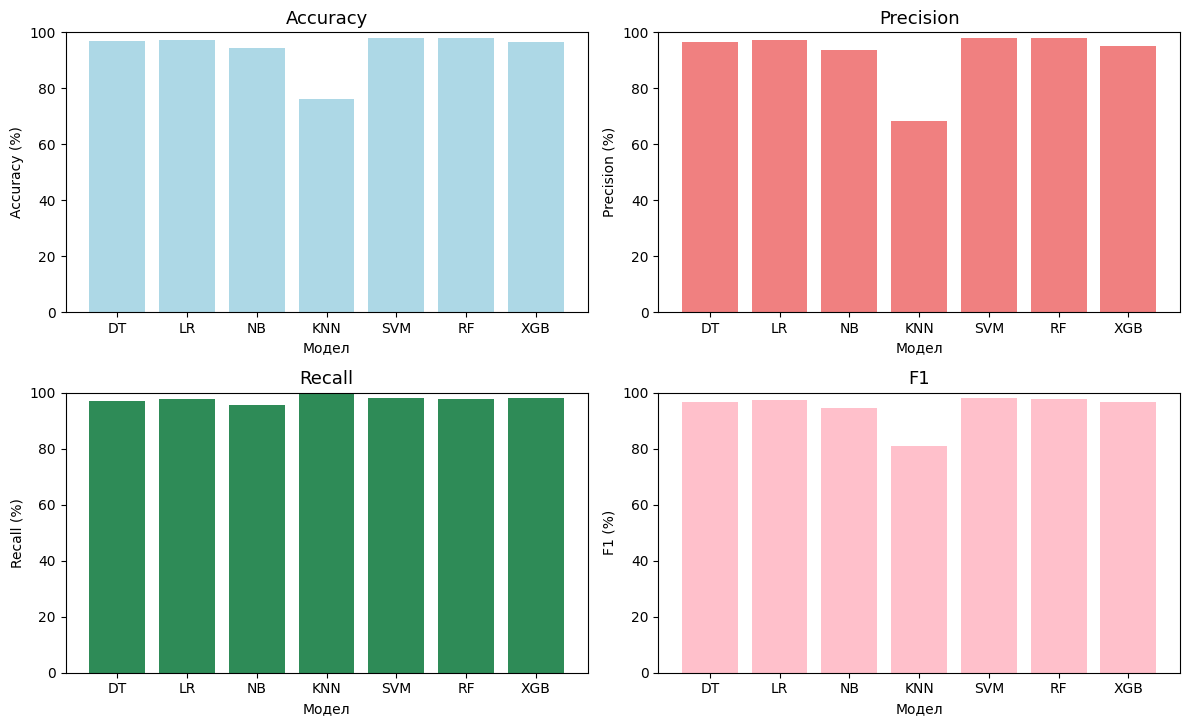

In [ ]:
import matplotlib.pyplot as plt

results = {
    "DT":     [0.9674, 0.9665, 0.9701, 0.9683],
    "LR": [0.9738, 0.9724, 0.9766, 0.9745],
    "NB":     [0.9445, 0.9377, 0.9552, 0.9464],
    "KNN":    [0.7609, 0.6822, 0.9991, 0.8108],
    "SVM":    [0.9798, 0.9795, 0.9813, 0.9804],
    "RF":     [0.9780, 0.9788, 0.9783, 0.9786],
    "XGB":    [0.9645, 0.9520, 0.9802, 0.9659]
}

metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['lightblue', 'lightcoral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 100])
    ax.set_ylabel(f"{metrics[i]} (%)")
    ax.set_xlabel("Модел")
    ax.set_title(f"{metrics[i]}", fontsize=13)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from sklearn.cluster import KMeans

num_clusters = 2 

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_
print(clusters)


[0 0 0 ... 1 1 1]


# Word2Vec

In [5]:


sentences = df['tweet_tokens'].tolist()

w2v_model = Word2Vec(sentences, vector_size=300, window=10, min_count=5, workers=4,sg=1, negative=10)

def vectorize_tweet(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    else:
        return np.mean(vectors, axis=0)

X = np.array([vectorize_tweet(tokens) for tokens in df['tweet_tokens']])
y = df['BinaryNumTarget'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    results[name] = (acc, prec, rec, f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Random Forest: Accuracy=0.9585, Precision=0.9542, Recall=0.9654, F1=0.9598
Decision Tree: Accuracy=0.8491, Precision=0.8536, Recall=0.8519, F1=0.8527
KNN: Accuracy=0.9879, Precision=0.9891, Recall=0.9873, F1=0.9882
SVM: Accuracy=0.9150, Precision=0.9135, Recall=0.9215, F1=0.9175


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:02:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9687, Precision=0.9680, Recall=0.9712, F1=0.9696
Logistic Regression: Accuracy=0.9143, Precision=0.9124, Recall=0.9213, F1=0.9168


In [ ]:
from gensim.models import KeyedVectors

# Word importance

In [ ]:

rf_model = models["Random Forest"]
feature_names = vectorizer.get_feature_names_out()

importances = rf_model.feature_importances_

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances.head(20))


                 Feature  Importance
678                biden    0.049320
4719             vaccine    0.031350
1188               covid    0.011908
2512                 joe    0.010596
600              ballots    0.010430
3301              pelosi    0.009090
4716          vaccinated    0.007795
2818           marijuana    0.007331
2179             highest    0.007032
1782               fauci    0.006693
680               bidens    0.006379
2276  hydroxychloroquine    0.006122
1189             covid19    0.006094
4717         vaccination    0.006015
4789                wage    0.005807
1920               fraud    0.005708
588           background    0.005502
2960                more    0.005357
1560            election    0.005142
2323            immunity    0.005030


In [17]:
df['tweet_new'] = df['tweet_new'].str.replace(r'\bamp\b', '', regex=True).str.strip()


# Word cloud

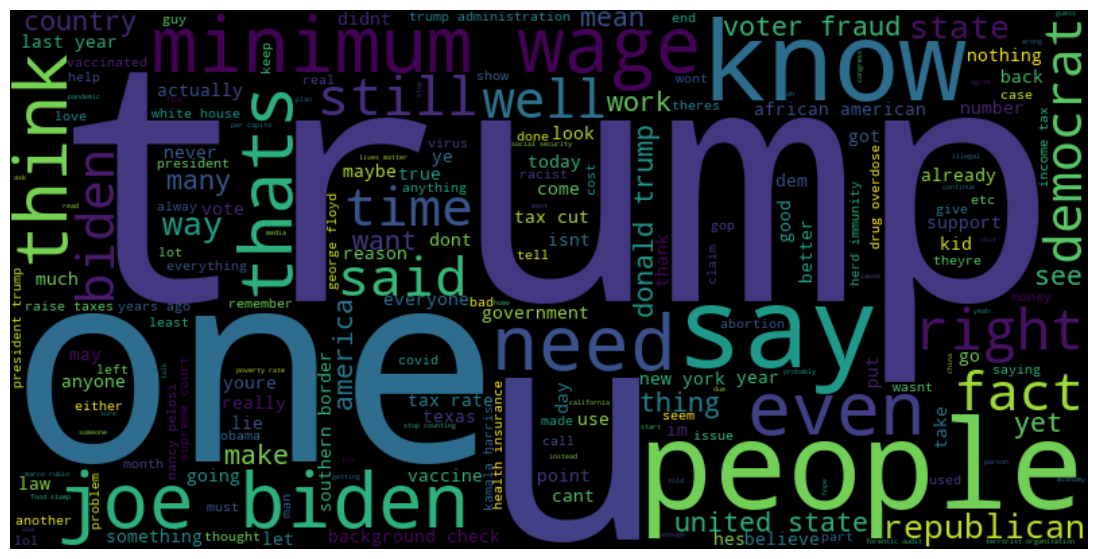

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['tweet_new'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


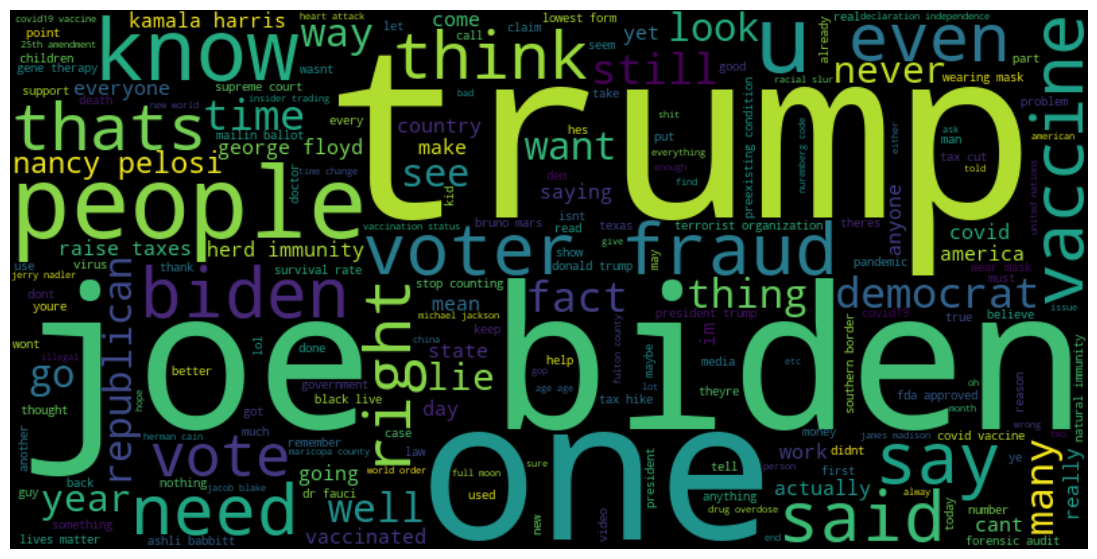

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_false = df[df['BinaryNumTarget']==0.0]

text = ' '.join(df_false['tweet_new'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


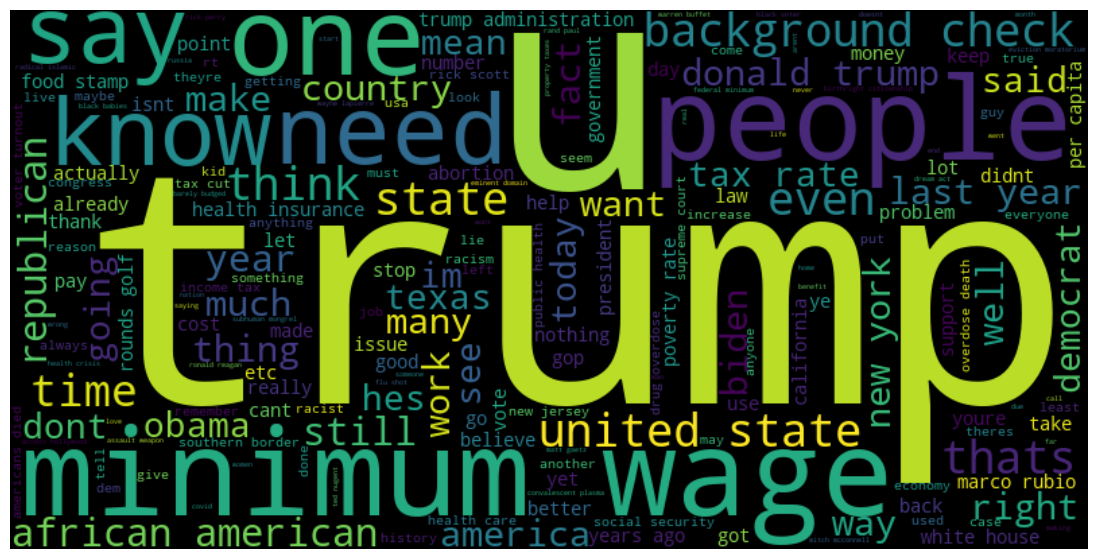

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_true = df[df['BinaryNumTarget']==1.0]


text = ' '.join(df_true['tweet_new'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Clustering

In [ ]:
import ast
df['tweet_tokens'] = df['tweet_tokens'].apply(ast.literal_eval)

In [10]:
# Word2vec

from sklearn.preprocessing import normalize


df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


model = w2v_model

def ReturnVector(x):
    if x in model.wv:
        return model.wv[x]
    else:
        return np.zeros(model.vector_size)

def Sentence_Vector(sentence):
    vectors = [ReturnVector(word) for word in sentence if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)



X = np.array([Sentence_Vector(tokens) for tokens in df['tweet_tokens']])


X_norm = normalize(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto', verbose=1)
labels = kmeans.fit_predict(X_norm)

print("Gotovi labeli:", labels)
print("Inercija:", kmeans.inertia_)


Initialization complete
Iteration 0, inertia 96059.81836202224.
Iteration 1, inertia 52938.350747588964.
Iteration 2, inertia 52556.25105738.
Iteration 3, inertia 51776.36470469181.
Iteration 4, inertia 51256.294118449616.
Iteration 5, inertia 51129.2217503501.
Iteration 6, inertia 51102.48710361715.
Iteration 7, inertia 51094.24456731371.
Iteration 8, inertia 51090.41108290547.
Iteration 9, inertia 51088.93742145329.
Iteration 10, inertia 51088.45402748831.
Iteration 11, inertia 51088.2815090195.
Iteration 12, inertia 51088.20815452976.
Iteration 13, inertia 51088.1803196751.
Iteration 14, inertia 51088.17056544959.
Converged at iteration 14: center shift 5.967462188375969e-08 within tolerance 1.322474862813592e-07.
Gotovi labeli: [1 1 1 ... 1 1 1]
Inercija: 51088.167568525336


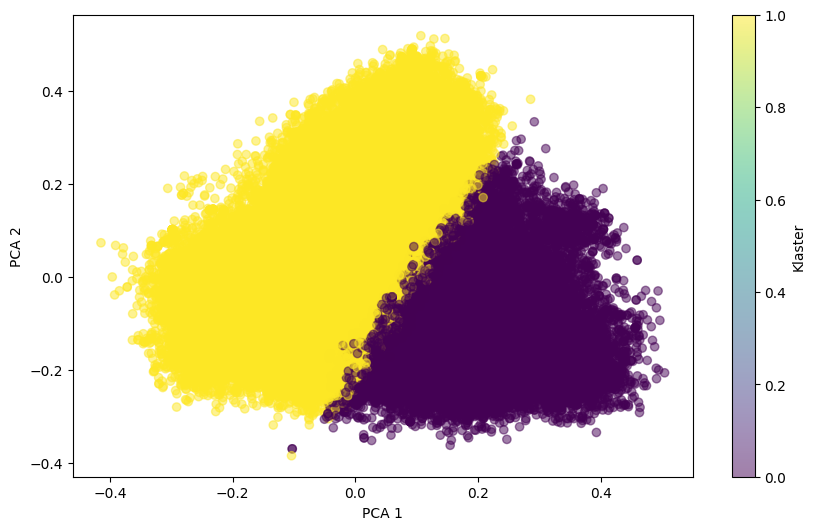

In [11]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Klaster")
plt.show()


In [12]:
from sklearn.metrics import adjusted_rand_score, accuracy_score


print("Adjusted Rand Index:", adjusted_rand_score(df['BinaryNumTarget'], labels))


Adjusted Rand Index: 0.04536617810686552


In [13]:

print("Accuracy:", accuracy_score(df['BinaryNumTarget'], labels))


Accuracy: 0.6067452570083012


In [ ]:
# TF IDF
vectorizer = TfidfVectorizer(max_features=5000) 

X = vectorizer.fit_transform(df['tweet_new'])

X = X.toarray()

print("TF-IDF transformation complete. Shape:", X.shape)

TF-IDF transformation complete. Shape: (134198, 5000)


In [ ]:

# Tri klastera
num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

print("Clustering complete. Cluster labels assigned!")

Clustering complete. Cluster labels assigned!


In [ ]:

print(df['cluster'].value_counts())

cluster
0    86026
2    26809
1    21363
Name: count, dtype: int64


In [ ]:
# Dva klastera
num_clusters = 2 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster2'] = kmeans.fit_predict(X)

print("Clustering complete. Cluster labels assigned!")

Clustering complete. Cluster labels assigned!


In [ ]:
from sklearn.metrics import adjusted_rand_score, accuracy_score


print("Adjusted Rand Index:", adjusted_rand_score(df['BinaryNumTarget'], df['cluster2']))


Adjusted Rand Index: 0.02698035119377326


In [ ]:

print("Accuracy:", accuracy_score(df['BinaryNumTarget'], df['cluster2']))


Accuracy: 0.5822441467085948


In [ ]:
testing_df = {'Sentence': df["tweet_new"], 'Labels': df['BinaryNumTarget'].astype(int), 'Prediction': df['cluster2']}
testing_df = pd.DataFrame(data=testing_df)

testing_df.head(20)

,Sentence,Labels,Prediction
0,biden blunders 6 month update inflation delta ...,1,1
1,not as many people are literally starving out ...,1,0
2,supreme court is siding super rich property ow...,1,1
3,biden blunders broken campaign promises inflat...,1,1
4,i agree confluence events right now is unprece...,1,1
5,ive said this before it really is incredibly w...,1,0
6,as many face backlogged rent payments american...,1,1
7,doj instructing supremecourt donotblock newevi...,1,1
8,its win americansim not worried taking credit ...,1,0
9,there is not never has been stimulus checks pl...,1,1


In [ ]:

from sklearn.metrics import confusion_matrix


def purity_score(y_true, y_pred):
  
    contingency_matrix = confusion_matrix(y_true, y_pred)
    
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity_score(df['BinaryNumTarget'].astype(int), df['cluster2'])

0.5822441467085948

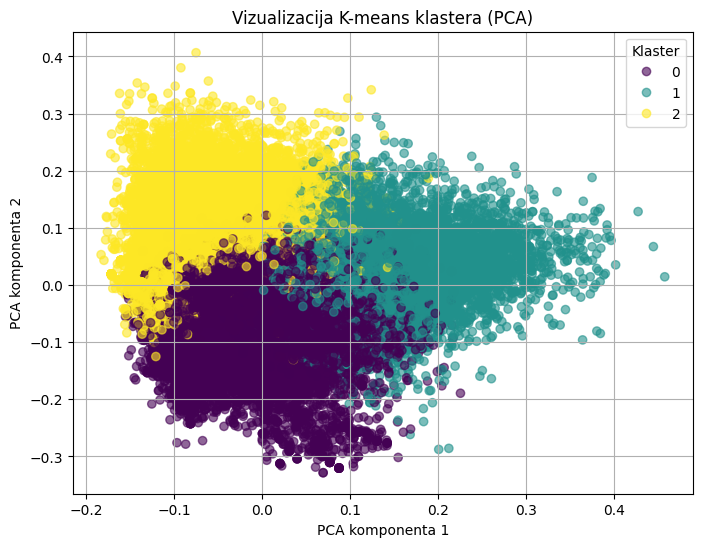

In [ ]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title("Vizualizacija K-means klastera (PCA)")
plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.legend(*scatter.legend_elements(), title="Klaster")
plt.grid(True)
plt.show()


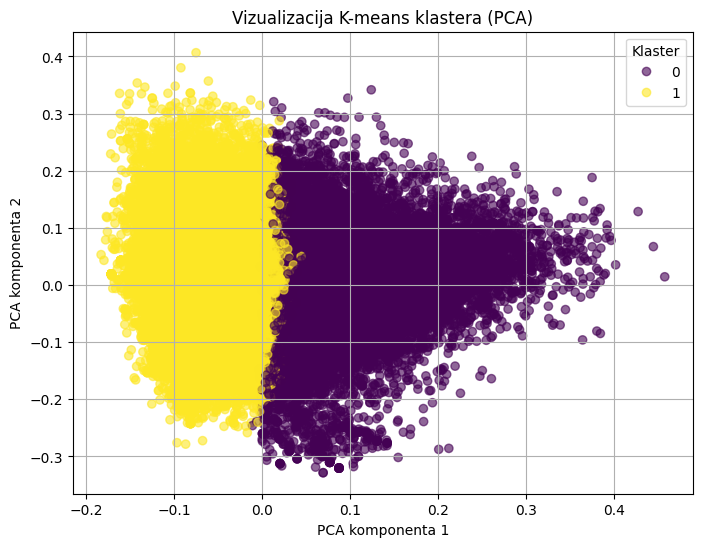

In [ ]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster2'], cmap='viridis', alpha=0.6)
plt.title("Vizualizacija K-means klastera (PCA)")
plt.xlabel("PCA komponenta 1")
plt.ylabel("PCA komponenta 2")
plt.legend(*scatter.legend_elements(), title="Klaster")
plt.grid(True)
plt.show()


In [ ]:

from collections import Counter

for cluster in range(2):
    words = " ".join(df[df['cluster'] == cluster]['tweet_new']).split()
    common_words = Counter(words).most_common(10)
    print(f"\n=== Most Common Words in Cluster {cluster} ===")
    print(common_words)



=== Most Common Words in Cluster 0 ===
[('is', 40071), ('that', 26337), ('are', 22442), ('it', 18077), ('not', 17649), ('i', 16662), ('have', 15770), ('they', 14294), ('more', 13407), ('be', 13293)]

=== Most Common Words in Cluster 1 ===
[('you', 33164), ('is', 10804), ('that', 10405), ('are', 9758), ('it', 7493), ('your', 7130), ('not', 6950), ('have', 6120), ('i', 5982), ('do', 4744)]


In [ ]:
df2 = pd.read_csv("data/Truth_Seeker_Model_Dataset.csv")

In [ ]:
df2.columns

Index(['Unnamed: 0', 'author', 'statement', 'target', 'BinaryNumTarget',
       'manual_keywords', 'tweet', '5_label_majority_answer',
       '3_label_majority_answer'],
      dtype='object')

In [ ]:
kol = ['Unnamed: 0','tweet','5_label_majority_answer',
       '3_label_majority_answer']

In [ ]:
df2 = df2[kol]

In [ ]:
df_merged = pd.merge(df, df2, on='tweet', how='left')

In [ ]:
df_merged.shape

(134198, 41)

In [ ]:
df_merged['3_label_majority_answer'].unique()

array(['Agree', 'Disagree'], dtype=object)

In [ ]:
df_merged['5_label_majority_answer'].unique()

array(['Mostly Agree', 'NO MAJORITY', 'Agree', 'Mostly Disagree',
       'Disagree'], dtype=object)

In [ ]:
label_mapping = {
    'Mostly Agree': 0,
    'Agree': 1,
    'NO MAJORITY': 2,
    'Mostly Disagree': 3,
    'Disagree': 4
}

df_merged['label_encoded'] = df_merged['5_label_majority_answer'].map(label_mapping)


In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters (we can experiment with different values)
num_clusters = 5 # Assuming we want to separate news into 2 groups

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_merged['cluster'] = kmeans.fit_predict(X)

print("Clustering complete. Cluster labels assigned!")

Clustering complete. Cluster labels assigned!


In [ ]:
print("Adjusted Rand Index:", adjusted_rand_score(df_merged['label_encoded'], df_merged['cluster']))
purity_score(df_merged['label_encoded'], df_merged['cluster'])

Adjusted Rand Index: 0.0005454157729580057


0.4056543316591901

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Pretpostavimo da koristiš već izvučene numeričke osobine
X_features = df2[['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Conjunctions',
 'Determiners',
 'Prepositions',
 'Digits',
 'followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']]  # dodaš šta imaš

# Standardizacija
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# KMeans klasterovanje
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

# Evaluacija (ako imaš stvarne labele)
ari = adjusted_rand_score(df2['BinaryNumTarget'], labels)
sil = silhouette_score(X_scaled, labels)

print("ARI:", ari)
print("Silhouette score:", sil)


ARI: 0.00806707053407438
Silhouette score: 0.0944655083846814


# Fast Text

In [14]:
from gensim.models import FastText

sentences = df['tweet_tokens'].tolist()

model = FastText(sentences, vector_size=100, window=5, min_count=1, sg=1)

model.save('fasttext_model.model')

def get_vector(tokens, model):
    
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:  
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

X = np.array([get_vector(tokens, model) for tokens in df['tweet_tokens']])

y = df['BinaryNumTarget'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}\n")



--- Decision Tree ---
Accuracy: 0.8354
Precision: 0.8380
Recall: 0.8418
F1 Score: 0.8399

--- Random Forest ---
Accuracy: 0.9408
Precision: 0.9380
Recall: 0.9471
F1 Score: 0.9425

--- KNN ---
Accuracy: 0.9772
Precision: 0.9783
Recall: 0.9773
F1 Score: 0.9778

--- SVM ---
Accuracy: 0.7928
Precision: 0.7839
Recall: 0.8229
F1 Score: 0.8029



C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:31:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.9459
Precision: 0.9436
Recall: 0.9513
F1 Score: 0.9474

--- Logistic Regression ---
Accuracy: 0.7882
Precision: 0.7832
Recall: 0.8118
F1 Score: 0.7972

--- Naive Bayes ---
Accuracy: 0.7398
Precision: 0.7578
Recall: 0.7241
F1 Score: 0.7406



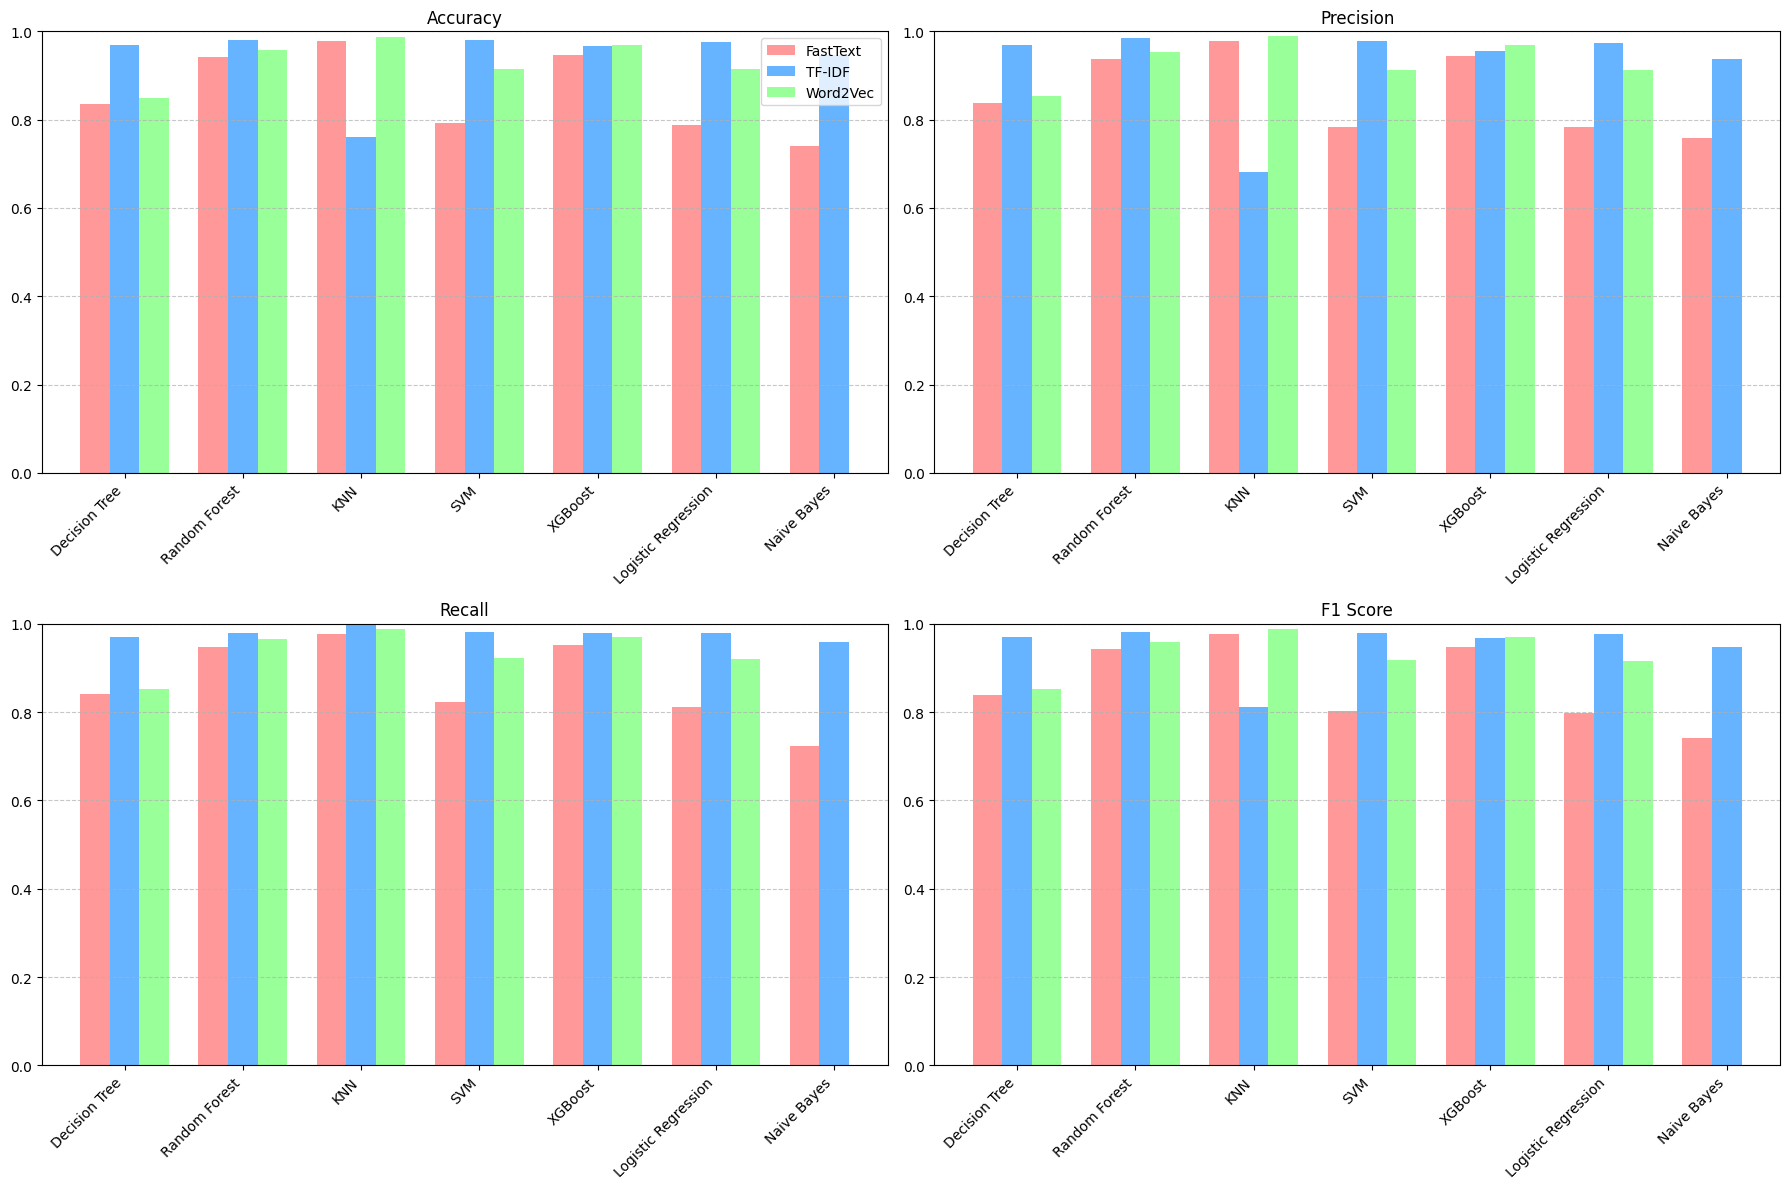

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Algoritmi
algorithms = ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'XGBoost', 'Logistic Regression', 'Naive Bayes']

# Metrike po reprezentaciji (redosled mora odgovarati algoritmima)
fasttext = {
    'Accuracy': [0.8354, 0.9408, 0.9772, 0.7928, 0.9459, 0.7882, 0.7398],
    'Precision': [0.8380, 0.9380, 0.9783, 0.7839, 0.9436, 0.7832, 0.7578],
    'Recall': [0.8418, 0.9471, 0.9773, 0.8229, 0.9513, 0.8118, 0.7241],
    'F1 Score': [0.8399, 0.9425, 0.9778, 0.8029, 0.9474, 0.7972, 0.7406]
}

word2vec = {
    'Accuracy': [0.8491, 0.9585, 0.9879, 0.9150, 0.9687, 0.9143],
    'Precision': [0.8536, 0.9542, 0.9891, 0.9135, 0.9680, 0.9124],
    'Recall': [0.8519, 0.9654, 0.9873, 0.9215, 0.9712, 0.9213],
    'F1 Score': [0.8527, 0.9598, 0.9882, 0.9175, 0.9696, 0.9168]
}

tfidf = {
    'Accuracy': [0.9693, 0.9813, 0.7609, 0.9795, 0.9659, 0.9752, 0.9458],
    'Precision': [0.9697, 0.9841, 0.6822, 0.9787, 0.9556, 0.9735, 0.9373],
    'Recall': [0.9705, 0.9794, 0.9991, 0.9814, 0.9790, 0.9783, 0.9583],
    'F1 Score': [0.9701, 0.9817, 0.8108, 0.9800, 0.9672, 0.9759, 0.9477]
}

# Boje i širina stubaca
colors = ['#ff9999', '#66b3ff', '#99ff99']
bar_width = 0.25
x = np.arange(len(algorithms))

# Crtanje grafika
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, ax in enumerate(axs.flat):
    metric = metrics[i]

    # Pomerene pozicije za grupisane stubiće
    ax.bar(x - bar_width, fasttext[metric], width=bar_width, label='FastText', color=colors[0])
    ax.bar(x, tfidf[metric], width=bar_width, label='TF-IDF', color=colors[1])
    ax.bar(x[:-1] + bar_width, word2vec[metric], width=bar_width, label='Word2Vec', color=colors[2])  # bez Naive Bayes

    ax.set_xticks(x)
    ax.set_xticklabels(algorithms, rotation=45, ha='right')
    ax.set_title(titles[i])
    ax.set_ylim(0.0, 1.00)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import hdbscan
from sklearn.preprocessing import normalize
from sklearn.metrics import adjusted_rand_score, silhouette_score

from gensim.models import FastText
ft_model = FastText.load("fasttext_model.model")  # ako si ga ranije snimila kao takvog
X = np.array([get_vector(tokens, ft_model) for tokens in df['tweet_tokens']])
X_norm = normalize(X)

# HDBSCAN model
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)  # možeš testirati sa 5, 10, 20...
labels = clusterer.fit_predict(X_norm)

# Evaluacija
true_labels = df['BinaryNumTarget'].astype(int)
ari = adjusted_rand_score(true_labels, labels)

# Neki se podaci mogu klasifikovati kao outliers (-1), pa ih izbacimo za silhouette
valid_indices = labels != -1
if valid_indices.sum() > 1:
    sil = silhouette_score(X_norm[valid_indices], labels[valid_indices])
else:
    sil = -1

print(f"Broj klastera (bez outliers): {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"ARI: {ari:.4f}")
print(f"Silhouette Score: {sil:.4f}")
